In [9]:
import rasterio
import numpy as np

In [10]:
# Carga de imágenes de 2020
with rasterio.open("2020/2020-01-02-00_00_2020-12-23-23_59_Sentinel-2_L2A_B02_(Raw).tiff") as red_2020_src:
    red_2020 = red_2020_src.read(1).astype(float)

with rasterio.open("2020/2020-01-02-00_00_2020-12-23-23_59_Sentinel-2_L2A_B08_(Raw).tiff") as nir_2020_src:
    nir_2020 = nir_2020_src.read(1).astype(float)

# Carga de imágenes de 2024
with rasterio.open("2024/2024-01-06-00_00_2024-04-06-23_59_Sentinel-2_L2A_B04_(Raw).tiff") as red_2024_src:
    red_2024 = red_2024_src.read(1).astype(float)

with rasterio.open("2024/2024-01-06-00_00_2024-04-06-23_59_Sentinel-2_L2A_B08_(Raw).tiff") as nir_2024_src:
    nir_2024 = nir_2024_src.read(1).astype(float)

In [11]:
def calc_ndvi(nir, red):
    ndvi = (nir - red) / (nir + red)
    return ndvi

ndvi_2020 = calc_ndvi(nir_2020, red_2020)
ndvi_2024 = calc_ndvi(nir_2024, red_2024)

/tmp/ipykernel_5454/2178025672.py:2: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


In [12]:
diff_ndvi = ndvi_2024 - ndvi_2020

In [13]:
deforestation_mask = diff_ndvi < -0.2

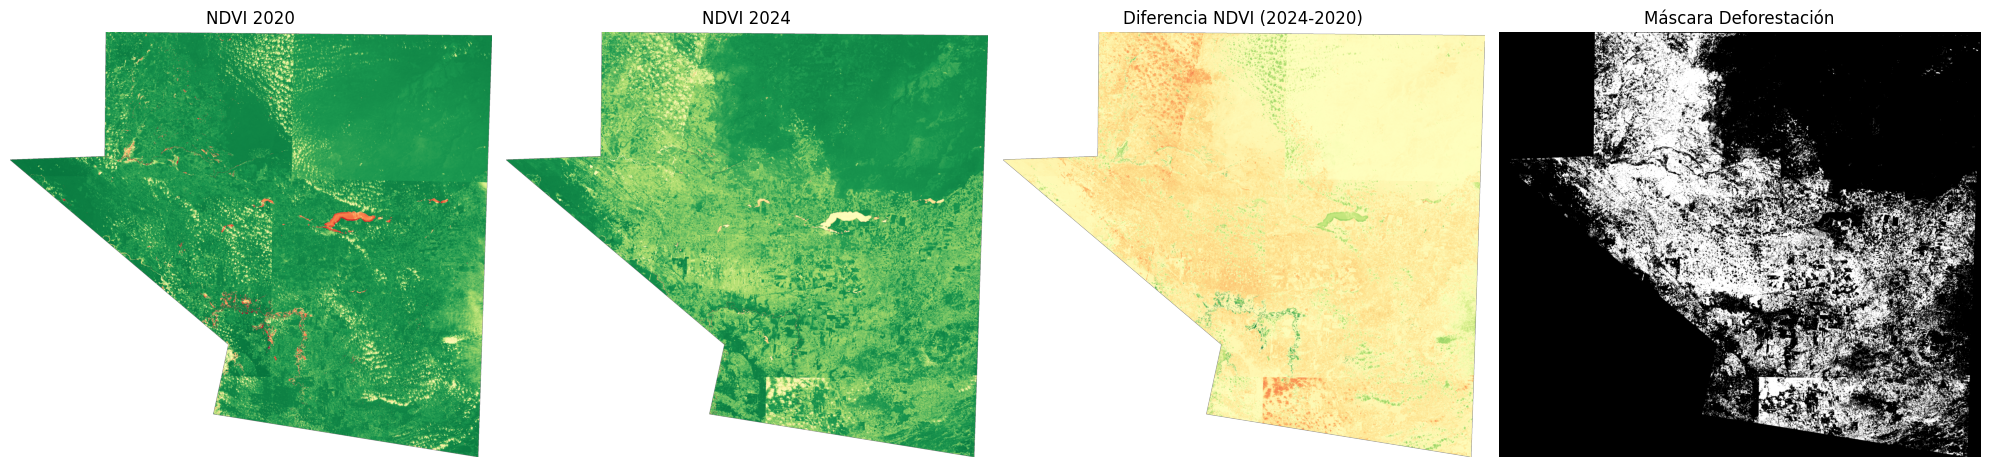

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(ndvi_2020, cmap='RdYlGn')
axs[0].set_title("NDVI 2020")

axs[1].imshow(ndvi_2024, cmap='RdYlGn')
axs[1].set_title("NDVI 2024")

axs[2].imshow(diff_ndvi, cmap='RdYlGn')
axs[2].set_title("Diferencia NDVI (2024-2020)")

axs[3].imshow(deforestation_mask, cmap='gray')
axs[3].set_title("Máscara Deforestación")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
res = red_2020_src.res[0] * 1000
pixel_area_km2 = (res * res) / 1_000_000

total_def_area = np.sum(deforestation_mask) * pixel_area_km2
print(f"Área deforestada: {total_def_area:.2f} km²")

Área deforestada: 1.18 km²
